<a href="https://colab.research.google.com/github/JacobHassan/ProjektPUM/blob/main/projekt_ML04_06_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/JacobHassan/ProjektPUM/blob/main/projekt_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold

In [ ]:
#%pip install openpyxl

In [ ]:
df = pd.read_csv(r'NY-House-Dataset.csv',sep=';',
                 index_col =  False,
                 on_bad_lines='skip')


In [ ]:
headers = pd.read_csv(r'NY-House-Dataset.csv', sep=';',nrows=0)
header_names = headers.columns.tolist()

In [ ]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [ ]:
column_rename_dict = {old_name: new_name for old_name, new_name in zip(df.columns, header_names)}

df.rename(columns=column_rename_dict, inplace=True)

In [ ]:
print(df['BEDS'])

0       2
1       7
2       4
3       3
4       7
       ..
4796    1
4797    1
4798    1
4799    2
4800    1
Name: BEDS, Length: 4801, dtype: int64


In [ ]:
str_col = ['BROKERTITLE', 'TYPE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME' , 'LONG_NAME', 'FORMATTED_ADDRESS']
int_col = ['BEDS', 'BATH','PROPERTYSQFT']
float_col = ['PRICE']

In [ ]:
df.shape

(4801, 17)

In [ ]:
df.isna().any()

BROKERTITLE                    False
TYPE                           False
PRICE                          False
BEDS                           False
BATH                           False
PROPERTYSQFT                   False
ADDRESS                        False
STATE                          False
MAIN_ADDRESS                   False
ADMINISTRATIVE_AREA_LEVEL_2    False
LOCALITY                       False
SUBLOCALITY                    False
STREET_NAME                    False
LONG_NAME                      False
FORMATTED_ADDRESS              False
LATITUDE                       False
LONGITUDE                      False
dtype: bool

In [ ]:
df[str_col] = df[str_col].apply(lambda x: x.astype(str))

In [ ]:
df[int_col] = df[int_col].apply(lambda x: x.astype(int))

In [ ]:
df[float_col] = df[float_col].apply(lambda x: x.astype(float))

In [ ]:
df.drop_duplicates(inplace = True)


In [ ]:
df.loc[df['BATH'] <0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


In [ ]:
df.loc[df['PRICE'] <0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


In [ ]:
df.loc[df['BEDS']<0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


In [ ]:
df.loc[df['PROPERTYSQFT']<0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


In [ ]:
df['FORMATTED_ADDRESS'] = df['FORMATTED_ADDRESS'].apply(lambda x: x.replace('#', ''))


In [ ]:
le = LabelEncoder()

In [ ]:
columns_to_encode = ['TYPE', 'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME']

In [ ]:
df[columns_to_encode] = df[columns_to_encode].apply(LabelEncoder().fit_transform)

In [ ]:
df.to_excel('test.xlsx')

In [ ]:
X = df[['BATH', 'BEDS', 'PROPERTYSQFT','TYPE',]]
y = df['PRICE']

In [ ]:
for column in  X:
  df[column]=np.abs(df[column])
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3- Q1
  df = df.drop(df.loc[df[column] > (Q3 + 1.5 * IQR)].index)
  df = df.drop(df.loc[df[column] < (Q1- 1.5 * IQR)].index)

In [ ]:
X = X.dropna()
y = y[X.index]


In [ ]:
print(df['BEDS'])

0       2
2       4
3       3
6       2
8       1
       ..
4794    2
4796    1
4797    1
4798    1
4799    2
Name: BEDS, Length: 2749, dtype: int64


<Axes: >

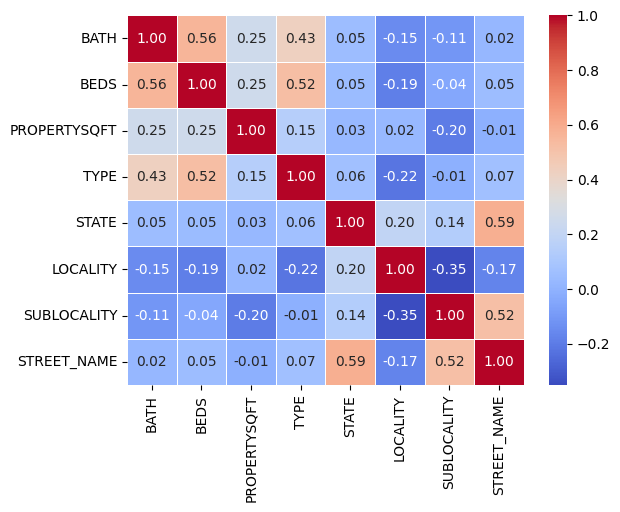

In [ ]:
selected_df =  df[['BATH', 'BEDS', 'PROPERTYSQFT','TYPE','STATE','LOCALITY','SUBLOCALITY','STREET_NAME',]]
sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

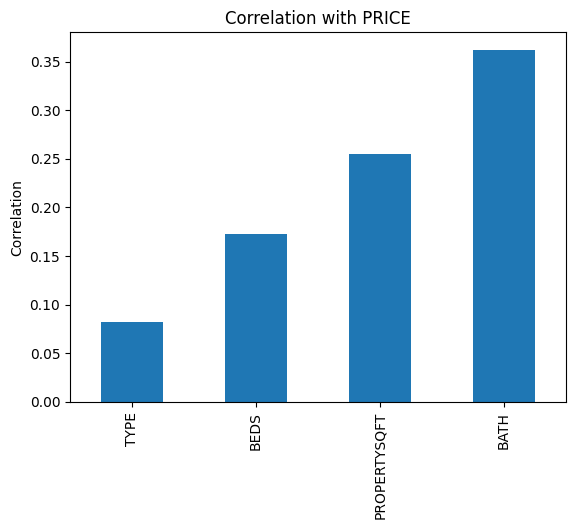

In [ ]:
# Select the columns
cor_df = df[['BATH', 'BEDS', 'PROPERTYSQFT','TYPE', 'PRICE',]]

# Calculate the correlation with 'PRICE'
correlation = cor_df.corr()['PRICE'].drop('PRICE')

# Plot the correlation values
correlation.sort_values().plot(kind='bar')
plt.title('Correlation with PRICE')
plt.ylabel('Correlation')
plt.show()

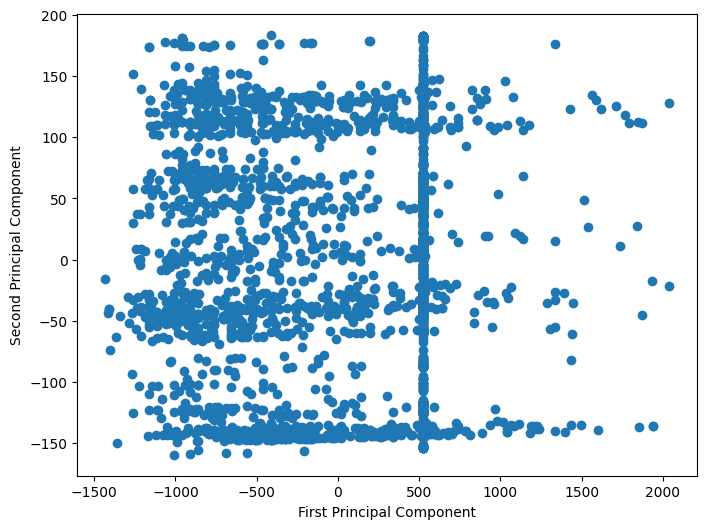

In [ ]:

selected_df = selected_df.dropna()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(selected_df)
df_pca = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])


plt.figure(figsize=(8,6))
plt.scatter(df_pca['principal component 1'], df_pca['principal component 2'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [ ]:
df.dtypes

BROKERTITLE                     object
TYPE                             int64
PRICE                          float64
BEDS                             int64
BATH                             int64
PROPERTYSQFT                     int64
ADDRESS                         object
STATE                            int64
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2      int64
LOCALITY                         int64
SUBLOCALITY                      int64
STREET_NAME                      int64
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
reg.coef_
reg.intercept_
y_predict = reg.predict(X_test)

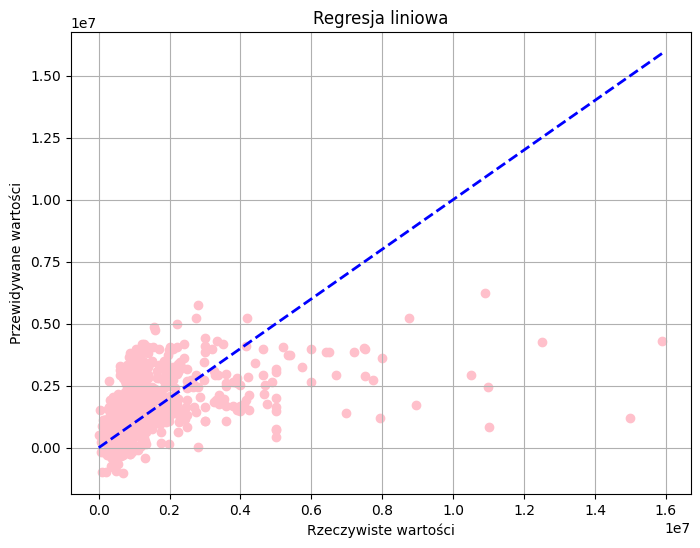

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, color='pink')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', linewidth=2)
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.title('Regresja liniowa')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score
from sklearn.linear_model import  HuberRegressor

In [ ]:
y_true = y_test
mean_absolute_error(y_true,y_predict)

845815.5800683211

In [ ]:
y_true = y_test
median_absolute_error(y_true,y_predict)

596332.2349432275

SŁABE DOPASOWANIE DANYCH DO MODELU NA POZIOMIE 17%

In [ ]:
y_true = y_test
r2_score(y_true,y_predict)

0.18896036958563867

In [ ]:
huber = HuberRegressor().fit(X_train, y_train)
huber.coef_
huber.intercept_
y_predict_huber = huber.predict(X_test)

In [ ]:
y_true = y_test
mean_absolute_error(y_true,y_predict_huber)

635520.2269324128

In [ ]:

y_true = y_test
median_absolute_error(y_true,y_predict_huber)


285069.80518222146

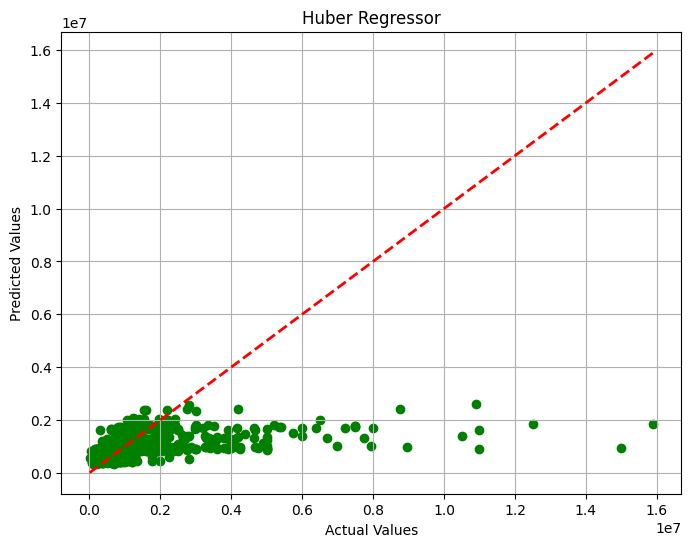

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict_huber, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(),y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Huber Regressor')
plt.grid(True)
plt.show()

In [ ]:
huber_model = HuberRegressor().fit(X_train, y_train)
huber_model.score(X_train, y_train)
huber_model.coef_
huber_model.intercept_
predictions_huber = np.round(huber_model.predict(X_test))
print(predictions_huber)

[ 850785.  555452. 1202202. ...  879986.  405334.  900789.]


SŁABE DOPASOWANIE DANYCH DO MODELU NA POZIOMIE 19% Nie wiem dlaczego za kazdym razem, gdy włączymy od nowa plik wyniki są różne, chyba ze wzgledu na dobieranie testowego modelu


In [ ]:
y_true = y_test
r2_score(y_true,y_predict_huber)

0.13966819171477773

In [ ]:
huber = HuberRegressor().fit(X_train,y_train)
huber.score(X_train,y_train)
huber.coef_
huber.intercept_
y_predic_huber = np.round(huber.predict(X_test))
print (y_predic_huber)

[ 850785.  555452. 1202202. ...  879986.  405334.  900789.]


In [ ]:
from sklearn.model_selection import cross_val_score
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
lin = LinearRegression()
cv_scores = cross_val_score(lin, X , y, cv=rkf, scoring='r2')
print(cv_scores)

[0.19295275 0.09388427 0.18710108 0.11251282 0.20595117 0.1587339
 0.20958403 0.11007381 0.24141856 0.11100908 0.2243473  0.10117553
 0.18280468 0.10173444 0.19542621]


Wielomian drugiego i trzeciego stopnia, regresja.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
degree2_pipeline = Pipeline([
    ('polynomial', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])
degree2_pipeline.fit(X_train, y_train)
predictions_degree2 = degree2_pipeline.predict(X_test)
r2_degree2 = r2_score(y_test, predictions_degree2)
print("Wynik R^2 dla regresji 2. stopnia:", r2_degree2)

Wynik R^2 dla regresji 2. stopnia: 0.20565081285521303


In [ ]:

repeat_kfold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
linear_model = LinearRegression()
poly_features_2 = PolynomialFeatures(2)
X_transformed = poly_features_2.fit_transform(X)
cross_val_scores_2nd_degree = cross_val_score(linear_model, X_transformed, y, cv=repeat_kfold, scoring='r2')
print(cross_val_scores_2nd_degree)

[0.23190868 0.15509971 0.32680635 0.15568858 0.2346526  0.26010076
 0.36216746 0.06593154 0.3002948  0.17235036 0.37022486 0.08555138
 0.32626336 0.11550168 0.30469915]


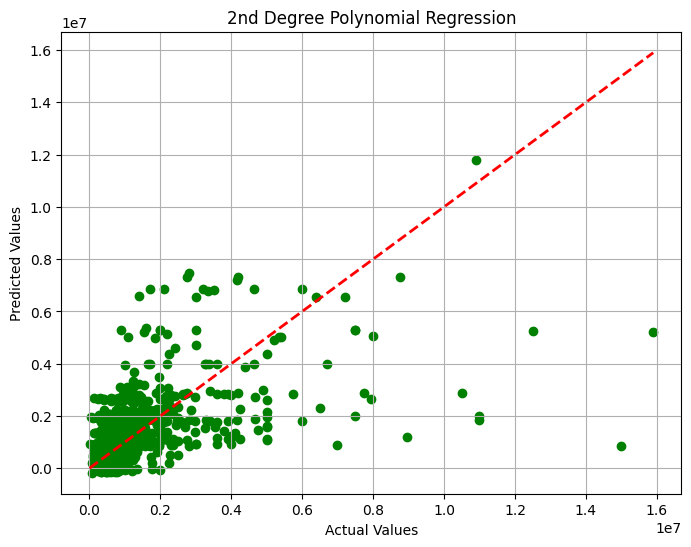

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_degree2, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('2nd Degree Polynomial Regression')
plt.grid(True)
plt.show()

In [ ]:
#3 stopien

degree3_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=3)),
    ('linear_regression', LinearRegression())
])


degree3_pipeline.fit(X_train, y_train)


predictions_degree3 = np.round(degree3_pipeline.predict(X_test))


print(predictions_degree3)
print("3 stopien r2 ", degree3_pipeline.score(X_test, y_test))

[1423685.  611116.  462366. ... 1667227.  355615. 3088930.]
3 stopien r2  0.1797411281562934


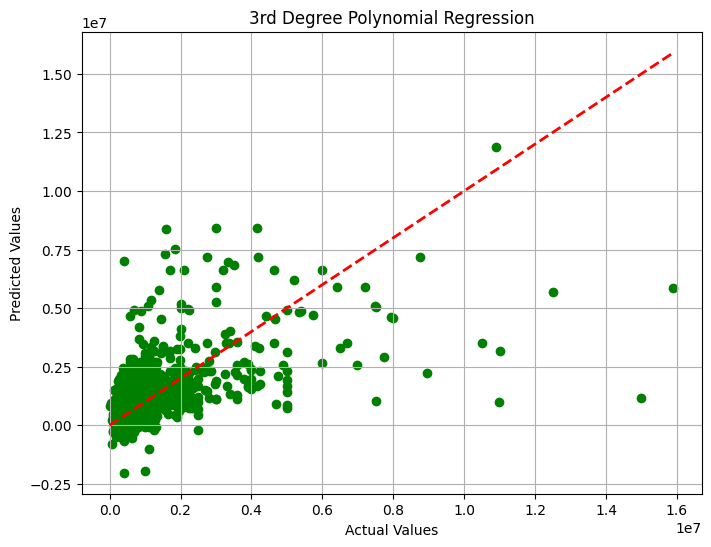

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_degree3, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('3rd Degree Polynomial Regression')
plt.grid(True)
plt.show()

In [ ]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,2,315000.0,2,2,1400,2 E 55th St Unit 803,207,"2 E 55th St Unit 803New York, NY 10022",26,4,10,56,Regis Residence,"Regis Residence, 2 E 55th St 803, New York, NY...",40.761255,-73.974483
2,Brokered by Sowae Corp,7,260000.0,4,2,2015,620 Sinclair Ave,301,"620 Sinclair AveStaten Island, NY 10312",28,4,16,153,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,2,69000.0,3,1,445,2 E 55th St Unit 908W33,161,"2 E 55th St Unit 908W33Manhattan, NY 10022",28,4,12,117,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
6,Brokered by Douglas Elliman - 575 Madison Ave,2,899500.0,2,2,2184,157 W 126th St Unit 1B,212,"157 W 126th St Unit 1BNew York, NY 10027",25,5,11,101,157,"157 W 126th St 1b, New York, NY 10027, USA",40.809448,-73.946777
8,Brokered by Pantiga Group Inc.,0,265000.0,1,1,750,875 Morrison Ave Apt 3M,41,"875 Morrison Ave Apt 3MBronx, NY 10473",22,9,5,113,Parking lot,"Parking lot, 875 Morrison Ave 3m, Bronx, NY 10...",40.821586,-73.874089


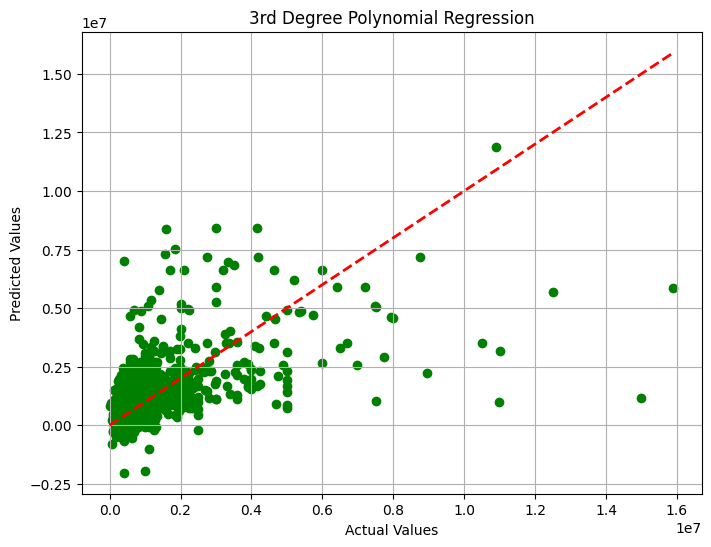

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_degree3, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('3rd Degree Polynomial Regression')
plt.grid(True)
plt.show()

In [ ]:
#cross knn
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
cross_val_scores_knn = cross_val_score(knn_model, X, y, cv=rkf, scoring='r2')
print(cross_val_scores_knn)

[-0.03243915  0.39475417  0.17028086  0.42747383  0.09893678  0.26772848
  0.45172322  0.29904488 -0.11444115  0.40096687  0.25701642  0.27014803
  0.33424684  0.29644174  0.23242565]


In [ ]:
#cross 3 stopien
repeat_kfold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
linear_model = LinearRegression()
poly_features_3 = PolynomialFeatures(3)
X_transformed_3 = poly_features_3.fit_transform(X)
cross_val_scores_3rd_degree = cross_val_score(linear_model, X_transformed_3, y, cv=repeat_kfold, scoring='r2')
print(cross_val_scores_3rd_degree)

[0.17867418 0.19478219 0.36925988 0.2675752  0.28569174 0.32659624
 0.46265105 0.22201633 0.28824    0.19221033 0.37890532 0.18833322
 0.33332796 0.21081306 0.37216512]


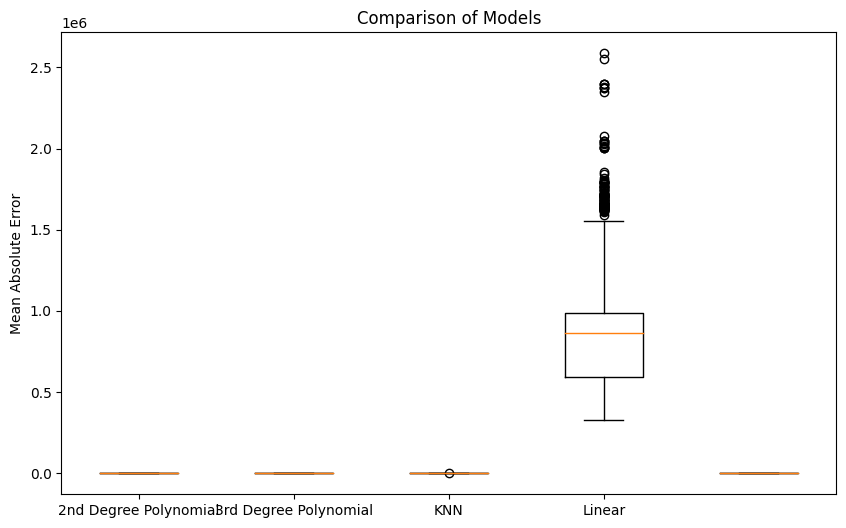

In [ ]:
#boxplot dla wszystkich modeli
plt.figure(figsize=(10, 6))
plt.boxplot([cross_val_scores_2nd_degree, cross_val_scores_3rd_degree, cross_val_scores_knn,predictions_huber, cv_scores])
plt.xticks([1, 2, 3, 4], ['2nd Degree Polynomial', '3rd Degree Polynomial', 'KNN', 'Linear'])
plt.ylabel('Mean Absolute Error')
plt.title('Comparison of Models')
plt.show()
